# t-SNE Project: Visualizing Handwritten Digits
🎯 Problem Statement:
Use t-SNE to reduce high-dimensional image pixel data (64 features) from the Digits dataset to 2D, so we can visually observe digit clusters.

Unlike PCA (which is linear), t-SNE is nonlinear and preserves local structure (similar points stay close).

We are diving deep into dimensionality reduction 🔥. Now let’s explore t-SNE (t-distributed Stochastic Neighbor Embedding) — a powerful technique for visualizing high-dimensional data in 2D or 3D, especially for clusters and patterns.

Dataset: sklearn.datasets.load_digits()
Each image:

Is 8x8 pixels = 64 features

Represents digits from 0 to 9

In [1]:
# Load and Explore the Dataset
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
X = digits.data         # shape: (1797, 64)
y = digits.target       # labels: 0–9

print("Shape:", X.shape)
print("Unique digits:", set(y))



Shape: (1797, 64)
Unique digits: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [2]:
# Scale the Features
# t-SNE is sensitive to magnitude — so scale it.
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)


In [3]:
# Apply t-SNE (2D)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)



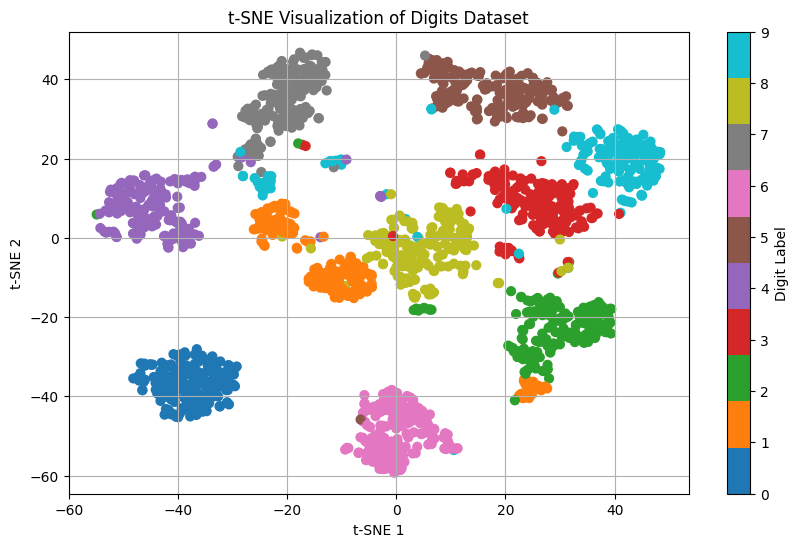

In [4]:
# Visualize Clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
plt.title("t-SNE Visualization of Digits Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter, label="Digit Label")
plt.grid()
plt.show()


### Interpretation:
Each digit clusters naturally (0s, 1s, 2s…)

Some overlap can still happen (e.g., 3 and 8)



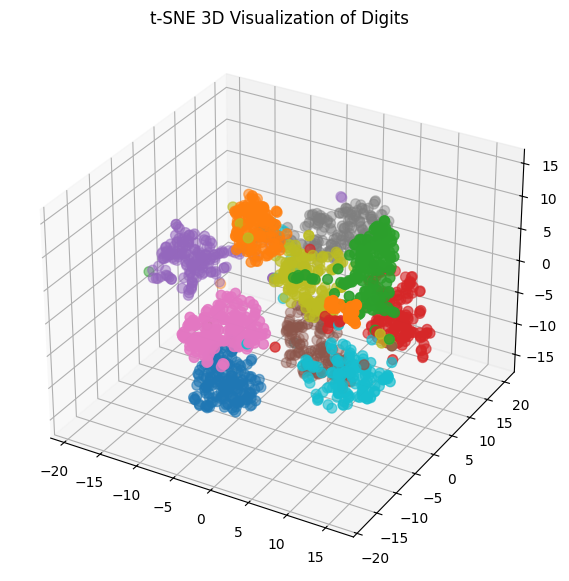

In [5]:
# Optional: Try 3D t-SNE
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_3d = tsne_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='tab10', s=50)
ax.set_title("t-SNE 3D Visualization of Digits")
plt.show()


# Key Parameters of t-SNE
| Parameter       | Meaning                                             |
| --------------- | --------------------------------------------------- |
| `n_components`  | Target dimension (2 or 3 usually for visualization) |
| `perplexity`    | Neighborhood size (5–50 works well)                 |
| `learning_rate` | Affects clustering tightness                        |
| `n_iter`        | Number of optimization iterations                   |


| Pros                             | Why It Helps                           |
| -------------------------------- | -------------------------------------- |
| 🎨 Excellent visualization       | Finds beautiful patterns in messy data |
| 🎯 Preserves local structure     | Nearby points stay close in 2D         |
| 🧠 Great for high-dim clustering | Reveals latent groups in complex data  |


| Cons                         | Why It Can Hurt                              |
| ---------------------------- | -------------------------------------------- |
| 🕒 Slow on large datasets    | Doesn’t scale well beyond 10k rows           |
| ❌ Not interpretable          | Output axes have no meaning                  |
| ⚖️ Not suitable for modeling | Can't use t-SNE for predictions              |
| 📉 Can vary with runs        | Randomness causes slightly different results |


### Real-World Use Cases
🧬 Visualizing gene expression clusters

🔍 Anomaly detection in sensor/IOT data

🧾 Unsupervised exploration of document embeddings

🖼️ Visualizing CNN features of images

-> Summary

| Step           | Action                                       |
| -------------- | -------------------------------------------- |
| Input          | 64-pixel image features (handwritten digits) |
| Reduction Tool | t-SNE with 2D projection                     |
| Result         | Natural digit clusters in 2D                 |
| Application    | Visual inspection, feature exploration       |



